# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [6]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [7]:
train, test = keras.datasets.cifar10.load_data()

In [8]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [9]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [10]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [11]:
## 超參數設定
"""
Set your required experiment parameters
"""
LEARNING_RATE = 0.01
EPOCHS = 30
BATCH_SIZE = 512
MOMENTUM = 1.0


In [12]:

"""
建立你的訓練與實驗迴圈並蒐集資料
"""
results = {}
for name in ['SGD', 'RMSprop', 'AdaGrad', 'Adam']:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print(f"Experiment with optimizer: {name}")
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    
    if name == 'SGD':
        optimizer = keras.optimizers.SGD()
    elif name == 'RMSprop':
        optimizer = keras.optimizers.RMSprop()
    elif name == 'AdaGrad':
        optimizer = keras.optimizers.Adagrad()
    else:
        optimizer = keras.optimizers.Adam()
        
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test))
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = f"exp-optimizer-{name}"
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with optimizer: SGD
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [===========================

Epoch 15/30
50000/50000 [==============================] - 5s 91us/step - loss: 1.4735 - acc: 0.4762 - val_loss: 1.5303 - val_acc: 0.4579
Epoch 16/30
50000/50000 [==============================] - 4s 88us/step - loss: 1.4471 - acc: 0.4836 - val_loss: 1.7023 - val_acc: 0.4057
Epoch 17/30
50000/50000 [==============================] - 4s 84us/step - loss: 1.4225 - acc: 0.4923 - val_loss: 1.5739 - val_acc: 0.4408
Epoch 18/30
50000/50000 [==============================] - 4s 85us/step - loss: 1.4005 - acc: 0.4984 - val_loss: 1.4738 - val_acc: 0.4714
Epoch 19/30
50000/50000 [==============================] - 4s 84us/step - loss: 1.3837 - acc: 0.5076 - val_loss: 1.5027 - val_acc: 0.4644
Epoch 20/30
50000/50000 [==============================] - 4s 85us/step - loss: 1.3577 - acc: 0.5165 - val_loss: 1.7526 - val_acc: 0.4133
Epoch 21/30
50000/50000 [==============================] - 4s 84us/step - loss: 1.3456 - acc: 0.5181 - val_loss: 1.6573 - val_acc: 0.4309
Epoch 22/30
50000/50000 [=========

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 5s 96us/step - loss: 1.9928 - acc: 0.2829 - val_loss: 1.8111 - val_acc: 0.3511
Epoch 2/30
50000/50000 [==============================] - 5s 91us/step - loss: 1.7643 - acc: 0.3715 - val_loss: 1.6993 - val_acc: 0.4045
Epoch 3/30
50000/50000 [==============================] - 5s 91us/step - loss: 1.6740 - acc: 0.4020 - val_loss: 1.6378 - val_acc: 0.4170
Epoch 4/30
50000/50000 [==============================] - 5s 92us/step - loss: 1.6116 - acc: 0.4251 - val_loss: 1.5932 - val_acc: 0.4267
Epoch 5/30
50000/50000 [==============================] - 5s 90us/step - loss: 1.5513 - acc: 0.4477 - val_loss: 1.5404 - val_acc: 0.4500
Epoch 6/30
50000/50000 [==============================] - 5s 92us/step - loss: 1.5128 - acc: 0.4620 - val_loss: 1.5097 - val_acc: 0.4674
Epoch 7/30
50000/50000 [==============================] - 5s 91us/step - loss: 1.4757 - acc: 0.4732 - val_loss: 1.5249 - val_acc

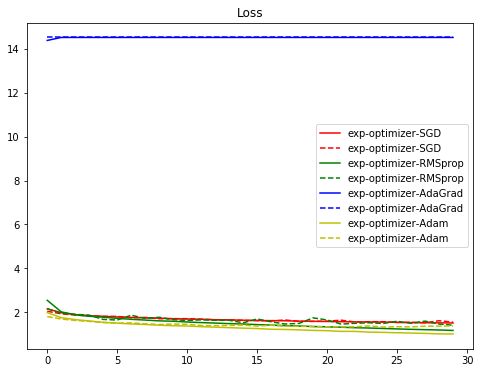

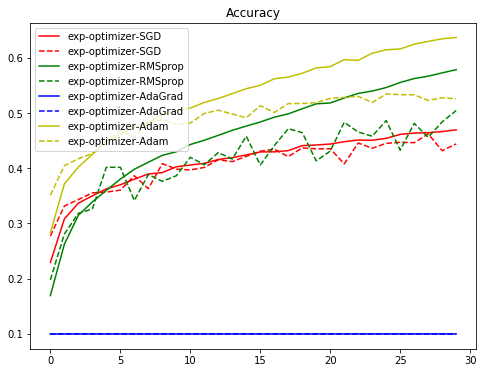

In [13]:


"""
將實驗結果繪出
"""
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8, 6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()